In [111]:
## Importing libraries
import pandas as pd 
import numpy as np 
from collections import defaultdict
import re

## Background:

    Sentiment Analysis is a branch of Natural Language Processing (NLP) that allows us to determine algorithmically whether a statement or document is “positive” or “negative” or "neutral"


## 1. Data cleaning

In [31]:
## All html tags and attributes (i.e., /<[^>]+>/) are removed

import string
symbols=string.punctuation

def remove_html_attributes(sentence):
    removed="".join([i for i in sentence if i not in symbols]) # iterating over a sentence to replace every punctuation mark with "" a
    return removed # return a sentence without punctuation mark



In [33]:
#All characters in the text are in lowercase.

def lowercase(sentence):
    return sentence.lower() # return a sentence in lowercase



In [34]:
import pandas as pd
#All stop words are removed

df_stop=pd.read_csv("stop_words.txt") ## Reading file that contains stop words
stopwords=list(df_stop['a']) # ##storing stop words in a list


def remove_stopwords(sentence):
    removed=" ".join([i for i in sentence.split() if i not in stopwords]) # iterating over a sentence to replace every punctuation mark with "" a
    return removed # return a sentence without punctuation mark



In [90]:
def clean_data(df):
    """This function will perform all the necassary functions to clean the data"""
    
    
    not_html=list(df['text']) # fetching text column
    
    for i in range(len(not_html)): # iterating on each row
        not_html[i]=remove_html_attributes(not_html[i]) # removing marks from each row
    df['text']=not_html # replacing the old text column with the updated one

   

    lower_case=list(df['text']) # fetching text column
    for i in range(len(lower_case)): # iterating on each row
        lower_case[i]=lowercase(lower_case[i]) # removing URL from each row
    df['text']=lower_case # replacing the old text column with the updated one


    
    not_stopwords=list(df['text']) # fetching text column
    for i in range(len(not_stopwords)): # iterating on each row
        not_stopwords[i]=remove_stopwords(not_stopwords[i]) # removing stop words from each row
    df['text']=not_stopwords # replacing the old text column with the updated one
    return df['text'] 


## 2. Reading the file

In [91]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/thanhtut/info284_lab/master/assignment1/twitter-airline-sentiment/Tweets.csv') #importing dataset

In [92]:
df=pd.DataFrame() ## We are not using the meta fields in the data, we will train our model only on the sentiment
                  ## and the label.

df['text']=clean_data(data) ## Storing the cleaned text
df['sentiment']=data['airline_sentiment']


## 3.Visualizing the data

### Class Distribution

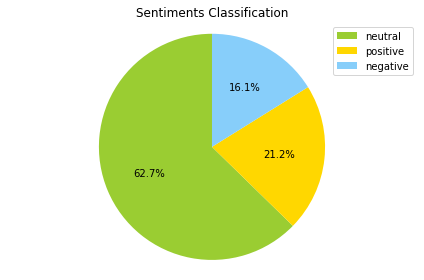

In [80]:
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = list(df['sentiment'].unique())
sizes = list(df['sentiment'].value_counts())
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts,per = plt.pie(sizes, colors=colors, startangle=90,autopct='%0.1f%%')
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Sentiments Classification')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total Number of neutral , postive, negative sentiments')

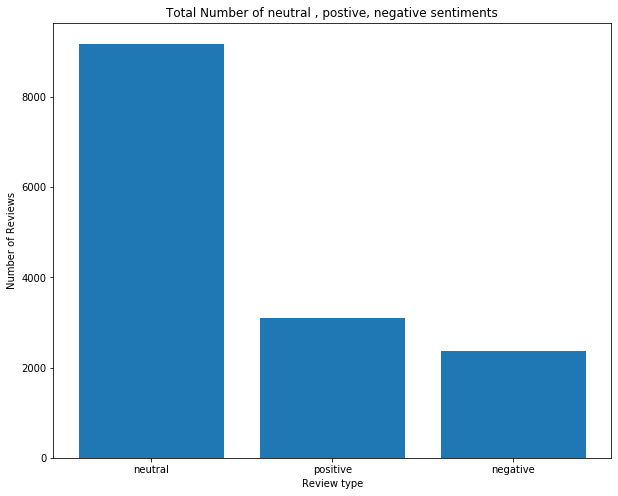

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xlabel("Review type")
plt.ylabel('Number of Reviews')
plt.bar(df['sentiment'].unique(),df['sentiment'].value_counts())
plt.title("Total Number of neutral , postive, negative sentiments")

### Wordclouds

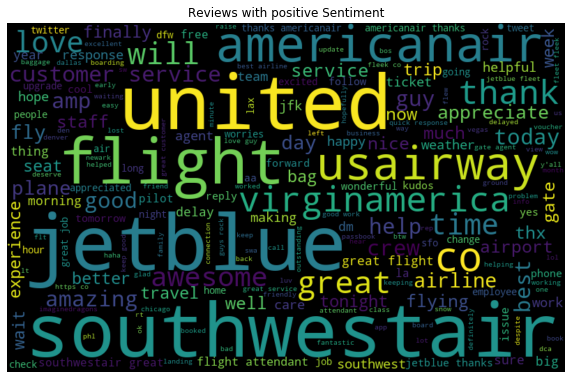

In [82]:
all_words =' '.join([text for text in df['text'][df['sentiment'] == "positive"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Reviews with positive Sentiment")
plt.axis('off')
plt.show()

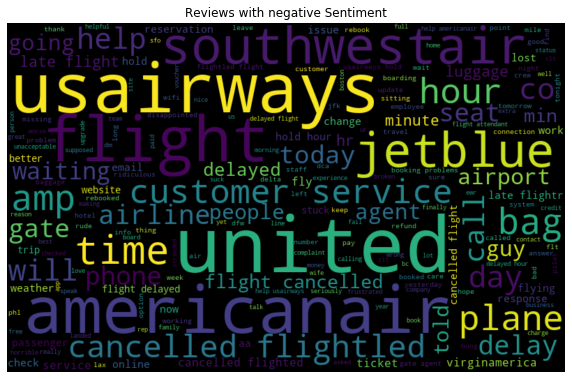

In [83]:
all_words =' '.join([text for text in df['text'][df['sentiment'] == "negative"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Reviews with negative Sentiment")
plt.axis('off')
plt.show()

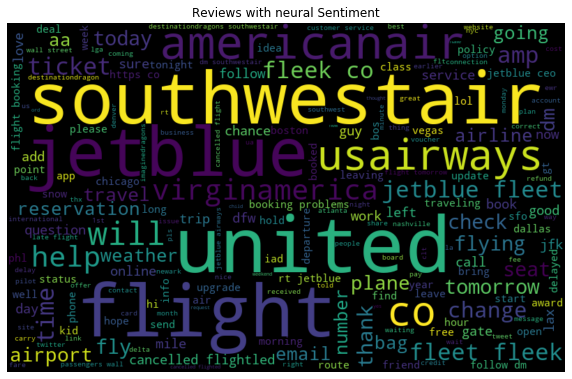

In [84]:
all_words =' '.join([text for text in df['text'][df['sentiment'] == "neutral"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Reviews with neural Sentiment")
plt.axis('off')
plt.show()

## 4. Splitting the data

In [93]:
## Converting the labels to numeric form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=list(le.fit_transform(data['airline_sentiment']))

## Splitting the data into train and test set 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(list(df['text']),labels, test_size=0.1, random_state=99)


    0 -->  Negative 
    1 -->  Neutral
    2 -->  Positive

## 5. Writing the model from scrarch

In [103]:
class NaiveBayes:
    
    def __init__(self,unique_classes):
        
        self.classes=unique_classes # Constructor is sinply passed with unique number of classes of the training set
        

    def addToDict(self,example,dict_index):
        
        if isinstance(example,np.ndarray): example=example[0]     
        for token_word in example.split(): #for every word in preprocessed example
            self.bow_dicts[dict_index][token_word]+=1 #increment in its count
            
    def train(self,dataset,labels):
        
     
        self.examples=dataset
        self.labels=labels
        self.bow_dicts=np.array([defaultdict(lambda:0) for index in range(self.classes.shape[0])])
        
        #only convert to numpy arrays if initially not passed as numpy arrays - else its a useless recomputation
        
        if not isinstance(self.examples,np.ndarray): self.examples=np.array(self.examples)
        if not isinstance(self.labels,np.ndarray): self.labels=np.array(self.labels)
            
        #constructing BoW for each category
        for cat_index,cat in enumerate(self.classes):
          
            all_cat_examples=self.examples[self.labels==cat] #filter all examples of category == cat
            
            #get examples preprocessed
            
            #cleaned_examples=[preprocess_string(cat_example) for cat_example in all_cat_examples]
            
            cleaned_examples=pd.DataFrame(data=all_cat_examples)
            
            #now costruct BoW of this particular category
            np.apply_along_axis(self.addToDict,1,cleaned_examples,cat_index)          
        
        '''
            LA-PLACE SMOOTHING
            ------------------------------------------------------------------------------------
             {for each word w [ count(w|c)+1 ] / [ count(c) + |V| + 1 ] } * p(c)
            ------------------------------------------------------------------------------------
            
        '''
      
        prob_classes=np.empty(self.classes.shape[0])
        all_words=[]
        cat_word_counts=np.empty(self.classes.shape[0])
        for cat_index,cat in enumerate(self.classes):
           
            #Calculating prior probability p(c) for each class
            prob_classes[cat_index]=np.sum(self.labels==cat)/float(self.labels.shape[0]) 
            
            #Calculating total counts of all the words of each class 
            count=list(self.bow_dicts[cat_index].values())
            cat_word_counts[cat_index]=np.sum(np.array(list(self.bow_dicts[cat_index].values())))+1 # |v| is remaining to be added
            
            #get all words of this category                                
            all_words+=self.bow_dicts[cat_index].keys()
                                                     
        
        #combine all words of every category & make them unique to get vocabulary -V- of entire training set
        
        self.vocab=np.unique(np.array(all_words))
        self.vocab_length=self.vocab.shape[0]
                                  
        #computing denominator value                                      
        denoms=np.array([cat_word_counts[cat_index]+self.vocab_length+1 for cat_index,cat in enumerate(self.classes)])                                                                             
        self.cats_info=[(self.bow_dicts[cat_index],prob_classes[cat_index],denoms[cat_index]) for cat_index,cat in enumerate(self.classes)]                               
        self.cats_info=np.array(self.cats_info)                                 
                                              
                                              
    def get_PosteriorProbability(self,test_example):                                
        
                                              
        likelihood_prob=np.zeros(self.classes.shape[0]) #to store probability w.r.t each class
        
        #finding probability w.r.t each class of the given test example
        for cat_index,cat in enumerate(self.classes): 
                             
            for test_token in test_example.split(): #split the test example and get p of each test word
                                              
                #This loop computes : for each word w [ count(w|c)+1 ] / [ count(c) + |V| + 1 ]                                     
                #get total count of this test token from it's respective training dict to get numerator value                           
                test_token_counts=self.cats_info[cat_index][0].get(test_token,0)+1
                
                #now get likelihood of this test_token word                              
                test_token_prob=test_token_counts/float(self.cats_info[cat_index][2])                              
                
                #remember why taking log? To prevent underflow!
                likelihood_prob[cat_index]+=np.log(test_token_prob)
                                              
        # we have likelihood estimate of the given example against every class but we need posterior probility
        post_prob=np.empty(self.classes.shape[0])
        for cat_index,cat in enumerate(self.classes):
            post_prob[cat_index]=likelihood_prob[cat_index]+np.log(self.cats_info[cat_index][1])                                  
      
        return post_prob
    
   
    def predict(self,test_set):
       
        predictions=[] #to store prediction of each test example
        for example in test_set: 
                                              
            #preprocess the test example the same way we did for training set exampels                                  
            #cleaned_example=preprocess_string(example) 
             
            #simply get the posterior probability of every example                                  
            post_prob=self.get_PosteriorProbability(example) #get prob of this example for both classes
            
            #simply pick the max value and map against self.classes!
            predictions.append(self.classes[np.argmax(post_prob)])
                
        return np.array(predictions)
    def score(self,X_test,y_test):
        pclasses=nb.predict(X_test) #get predcitions for test set

        #check how many predcitions actually match original test labels
        test_acc=np.sum(pclasses==y_test)/float(len(y_test)) 
        return test_acc*100
        


## 6. Training and testing the model 

In [112]:
model=NaiveBayes(np.unique(labels)) #instantiate a NB class object

model.train(X_train,y_train) #start tarining by calling the train function

print("Accuracy on test set ", model.score(X_test,y_test))

Accuracy on test set  73.42896174863388


## 7. Evaluating the model 

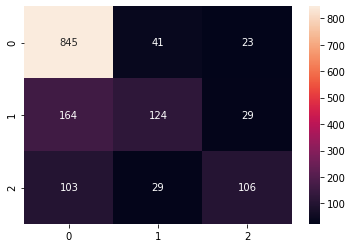

In [114]:
## Generating a heatmap for our classifer to see its accuracy in working
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
cm = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")


In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       909
           1       0.64      0.39      0.49       317
           2       0.67      0.45      0.54       238

    accuracy                           0.73      1464
   macro avg       0.69      0.59      0.62      1464
weighted avg       0.72      0.73      0.71      1464



### Sentiments which are correctly classified by our model

In [147]:
preds=model.predict(X_test)
for i in range(len(X_test)):
    if preds[i]==y_test[i]:
        print(i,") ",le.inverse_transform([y_test[i]]),"-->",X_test[i])
        print()

0 )  ['neutral'] --> united leisure military personnel safety reason highly recommended travel uniform

1 )  ['negative'] --> americanair helpful flight cancelled flightled reflight booking problems aa email cell notifications

2 )  ['negative'] --> americanair tired sitting a delayed 1702 computer

5 )  ['positive'] --> virginamerica nicely 👏

6 )  ['negative'] --> united 16 days flight 8 roundtrip

8 )  ['positive'] --> southwestair awwweesssooomee

9 )  ['negative'] --> united a friend traveled ua1470 today luggage recourse person buy clothes reimbursed

11 )  ['negative'] --> united 15hr flight wbroken dreamliner media system witness mental breakdown bounce walls remind 1k

12 )  ['negative'] --> jetblue call warehouse going tonight

13 )  ['positive'] --> southwestair whoa wanted hear early flight coming reply

14 )  ['neutral'] --> southwestair hows dallas incoming scheduled fly 1030 wondering ill stuck st louis

15 )  ['negative'] --> southwestair rebook flight hold 23 mins disc

707 )  ['positive'] --> jetblue flyfi httptco8jcediky9u

708 )  ['positive'] --> jetblue cinziannap quick response twitter

709 )  ['negative'] --> usairways expected wait time speak 800 number

710 )  ['negative'] --> americanair making worst flying experience 4 planes mechanical issues 12 hours counting

711 )  ['negative'] --> usairways speak book travel a minor phone keeps disconnecting advise website allow

712 )  ['negative'] --> united reasonable wait 45 mins bag check flight staff police overhead bins

714 )  ['negative'] --> southwestair damn cold sitting runway heat

718 )  ['negative'] --> united lusaka zambia guess bags plane iad

720 )  ['positive'] --> southwestair crew 3138 a great job keeping informed delays givethemraises

721 )  ['negative'] --> usairways a response 34 days

722 )  ['positive'] --> americanair glad hear serious injuries minor crash dfwairport evening

723 )  ['neutral'] --> southwestair a phishing email claiming southwest forward investigate

724 )  [

1366 )  ['negative'] --> jetblue glad happy bag a traveler entrusted property amp return damaged amp best answer

1367 )  ['neutral'] --> jetblue flight 1089 1098

1368 )  ['negative'] --> jetblue report updated info dont reach a super long wait hold main number

1369 )  ['negative'] --> southwestair promotion free round trip flights nope pay 200 extra chi vegas baitampswitch

1370 )  ['negative'] --> usairways dont time amtrak call partial refunds

1371 )  ['neutral'] --> usairways flying myrcltord tomorrow weather problematic

1372 )  ['negative'] --> americanair purchased main cabin xt f1571aus flight cancelled flightled rescheduled 1600 regular seats credit

1373 )  ['negative'] --> united cant fit lines pass feedback a big downgrade previous years

1374 )  ['negative'] --> united great a callback agent disconnected hold waiting connectfor 60min

1376 )  ['negative'] --> usairways bet dont paying customer check flight delays

1377 )  ['negative'] --> united worst airline world8 del

## 8. Command line utility

In [131]:
model=NaiveBayes(np.unique(labels)) #instantiate a NB class object

model.train(list(data['text']),labels) #start tarining by calling the train function

a=input("Enter the sentiment")
le.inverse_transform(model.predict([a]))

Enter the sentimentsouthwestair work major airline love black history month commercial


array(['positive'], dtype=object)

## 9. How a tweet is classified in a specific category

    We Just simply make two bag of words (BoW), one for each category, and each of them will simply contain words and their corresponding counts. All words belonging to “Positive” sentiment/label will go to one BoW and all words belonging to “Negative” sentiment will have their own BoW.
    Every time when a new sentiment comes, we calculate the probability of positve , negative and neutral class in it. And the class with highest probability is return as label.

## 10. Picking correct and in correctly classified sentiments:

In [144]:
Correct=["americanair ive flown years a complaint start listening customers worst",
        "jetblue btw samantha won flight"
        ]
le.inverse_transform(model.predict(Correct))

array(['negative', 'positive'], dtype=object)

    Model has classified them correctly because of the keywords used in them, Like in the first sentiment worst, complain are the main keywords which forces the model to have an increasaed probability of negative.
    Similarly, in the case of positvely classified sentiment, the words like won makes the probability of positive more than other labels.

In [141]:
Incorrect=["jetblue jetblue credit nice save",
          "jetblue service started triflight offer good routes lile florida upstate ny vegas"
          ]
le.inverse_transform(model.predict(Incorrect))

array(['neutral', 'neutral'], dtype=object)

    Because of the non-uniform distribution of classes, the model become a little biased towards neutral sentiments. Because the training data has 62% neutral sentiments so it becomes a little biased towards neutral label.